In [ ]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [78]:
urls = search_images("bird images", max_images=1)
urls[0]

'https://images.pexels.com/photos/97533/pexels-photo-97533.jpeg?cs=srgb&dl=animal-avian-bird-97533.jpg&fm=jpg'

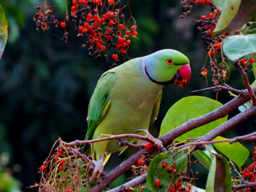

In [79]:
from fastdownload import download_url
dest = "is_bird_or_not/bird.jpg"

download_url(urls[0], dest)
from fastai.vision.all import *

im = Image.open(dest)
im.to_thumb(256,256)

In [80]:
download_url(search_images("forest images")[0], "is_bird_or_not/forest.jpg")

Path('is_bird_or_not/forest.jpg')

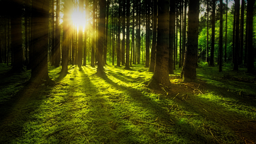

In [81]:
Image.open("is_bird_or_not/forest.jpg").to_thumb(256,256)

In [82]:
searches = "bird", "forest"
path = Path("bird_or_not")

In [83]:
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

ValueError: unknown file extension: .fpx

In [84]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

41

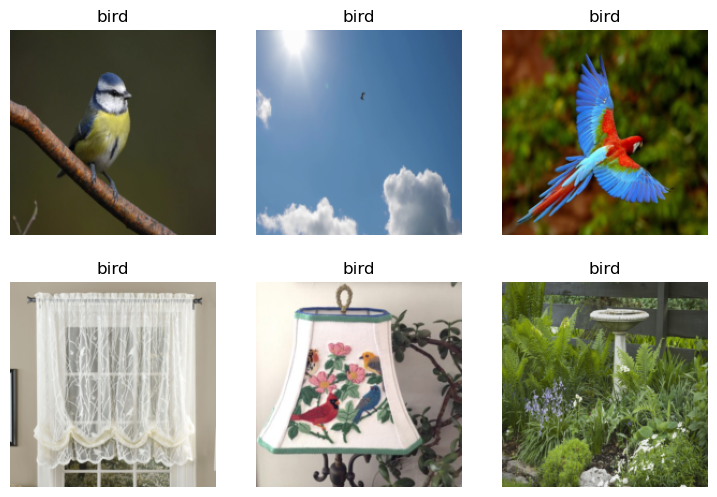

In [85]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('is_bird_or_not/bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}\nProbability it's a forest image: {probs[1]:.4f}")